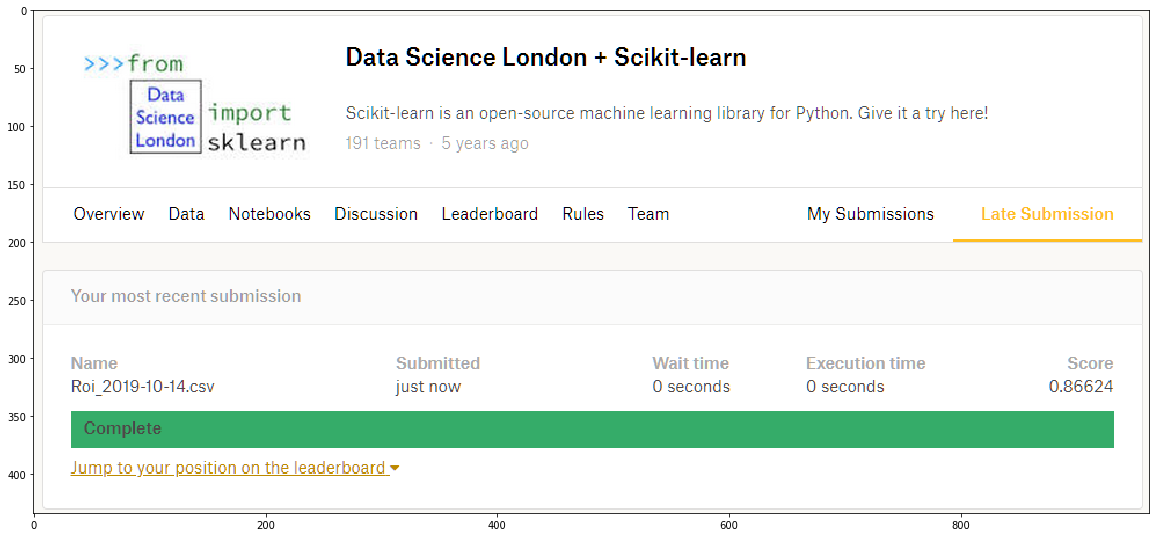

In [24]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("Capture.PNG")
plt.figure(figsize=(20,20))
plt.imshow(img)

In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

import os
print(os.listdir("./data"))

['test.csv', 'train.csv', 'trainLabels.csv']


In [2]:
train_data = pd.read_csv('./data/train.csv',header = None)
train_labels = pd.read_csv('./data/trainLabels.csv',header = None)
test_data =  pd.read_csv('./data/test.csv',header = None)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [9]:
print("Train_data:  ", train_data.shape)
print("Test_data:   ", test_data.shape)
print("Train_Answer:", train_labels.shape)
print("Train_Kind:  ", np.unique(train_labels))

Train_data:   (1000, 40)
Test_data:    (9000, 40)
Train_Answer: (1000, 1)
Train_Kind:   [0 1]


In [7]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [15]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.25, random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 40), (250, 40), (750, 1), (250, 1))

In [16]:
# 建立模型 (使用 5 顆樹，每棵樹的最大深度為 2)
clf = RandomForestClassifier(n_estimators=5, max_depth=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Accuracy:  0.78
Feature importance:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01845279
 0.38003573 0.00474692 0.26639411 0.         0.         0.
 0.16117274 0.         0.01058094 0.         0.         0.01285931
 0.         0.         0.         0.         0.         0.0197826
 0.         0.02745222 0.09852263 0.         0.         0.
 0.         0.         0.         0.        ]


P:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# 設定要訓練的超參數組合
n_estimators = [int(x) for x in np.linspace(10, 2000, 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = RandomizedSearchCV(clf, param_grid, n_jobs=-1, verbose=1, cv = 10)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
P:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
P:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [18]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.865333 using {'n_estimators': 952, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


In [19]:
# 使用最佳參數重新建立模型
clf_bestparam = RandomForestClassifier(n_estimators     =grid_result.best_params_['n_estimators'],
                                       min_samples_split=grid_result.best_params_['min_samples_split'],
                                       min_samples_leaf =grid_result.best_params_['min_samples_leaf'],
                                       max_features     =grid_result.best_params_['max_features'],
                                       max_depth        =grid_result.best_params_['max_depth'],
                                       bootstrap        =grid_result.best_params_['bootstrap'])
                                       
# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Feature importance: ", clf_bestparam.feature_importances_)

P:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy:  0.892
Feature importance:  [0.00701316 0.00744563 0.00861671 0.00795115 0.04749122 0.00593495
 0.06749175 0.02421186 0.00754789 0.00764608 0.00618717 0.00846707
 0.12415633 0.00789572 0.1334686  0.00762401 0.00651061 0.00752193
 0.06768314 0.00652798 0.00747122 0.00698965 0.02185053 0.02918229
 0.00881491 0.00912845 0.00802454 0.00782879 0.03879522 0.04015327
 0.00956787 0.00754664 0.0423687  0.00876681 0.0367384  0.00677367
 0.06760349 0.00867418 0.01770523 0.04862318]


In [20]:
pred  = clf_bestparam.predict(test_data)
rfc_best_pred = pd.DataFrame(pred)

rfc_best_pred.index += 1

rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('Roi_2019-10-14.csv',index=False)